## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

C:\Users\Standard\AppData\Local\Temp\ipykernel_9168\1117867087.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Standard\AppData\Local\Temp\ipykernel_9168\1117867087.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


Number of BX in a ORBIT: 3405
Data taking duration estimate: 89075 ns
Noisy channels:
TDC_CHANNEL
139    1268
64      752
63      749
Name: HEAD, dtype: int64
Number of unique orbits: 150
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 150


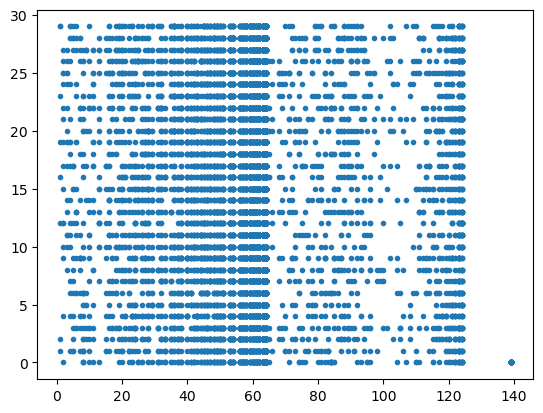

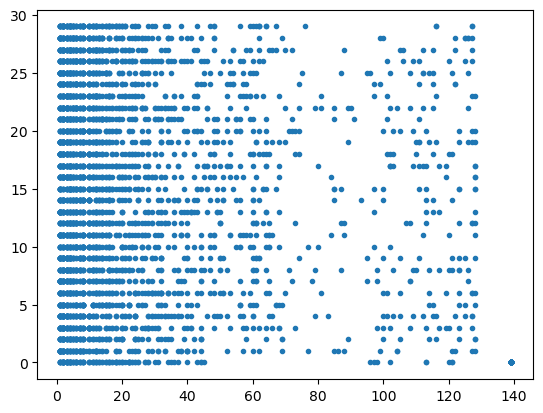

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset
# Choose N to be smaller than or equal to the maximum number of rows and larger than 10k.
N = 15000  # Adjust N as needed
file_path = 'data_000637.txt'
df = pd.read_csv(file_path, nrows=N)

# Task 2: Find out the number of BX in a ORBIT (the value 'x').
orbit_bx_counts = df['BX_COUNTER'].nunique()

# Task 3: Find out how much the data taking lasted.
# Assuming you read a representative fraction of the dataset, estimate the duration.
data_taking_duration_estimate = df['BX_COUNTER'].max() * 25  # Assuming 25ns per BX_COUNTER

# Task 4: Create a new column with the absolute time in ns.
df['ABSOLUTE_TIME_NS'] = df['ORBIT_CNT'] * 3564 * 25 + df['BX_COUNTER'] * 25

# Task 5: Replace the values of the HEAD column randomly with 0 or 1.
df['HEAD'] = np.random.choice([0, 1], size=len(df))

# Task 6: Create a new DataFrame that contains only the rows with HEAD=1.
df_head_1 = df[df['HEAD'] == 1]

# Task 7: Make two occupancy plots (one for each FPGA).
#0 refers to FPGA 0
#1 refers to FPGA 1
df0 = df[df["FPGA"]==0]#we consider only that dataframe where the FPGA number is 0
x0 = df0["TDC_CHANNEL"] #TDC channel for fpga 0 
y0 = df0["TDC_MEAS"]

df1 = df[df["FPGA"]==1]
x1 = df1["TDC_CHANNEL"] #TDC channel for fpga 0 
y1 = df1["TDC_MEAS"]

f = plt.figure()
plt.plot(x0,y0,".")
f.show()

g = plt.figure()
plt.plot(x1,y1,'.')
g.show()
# Task 8: Use the groupby method to find out the noisy channels.
noisy_channels = df.groupby('TDC_CHANNEL')['HEAD'].count().nlargest(3)

# Task 9: Count the number of unique orbits and unique orbits with at least one measurement from TDC_CHANNEL=139.
unique_orbits = df['ORBIT_CNT'].nunique()
unique_orbits_with_channel_139 = df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()

print(f"Number of BX in a ORBIT: {orbit_bx_counts}")
print(f"Data taking duration estimate: {data_taking_duration_estimate} ns")
print("Noisy channels:")
print(noisy_channels)
print(f"Number of unique orbits: {unique_orbits}")
print(f"Number of unique orbits with at least one measurement from TDC_CHANNEL=139: {unique_orbits_with_channel_139}")